In [45]:
import pandas as pd
import os

path=os.path.join(os.path.dirname(os.getcwd()), 'data', 'Walmart_Sales.csv')
data=pd.read_csv(path)

print(data.head())
data.isnull().sum()

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

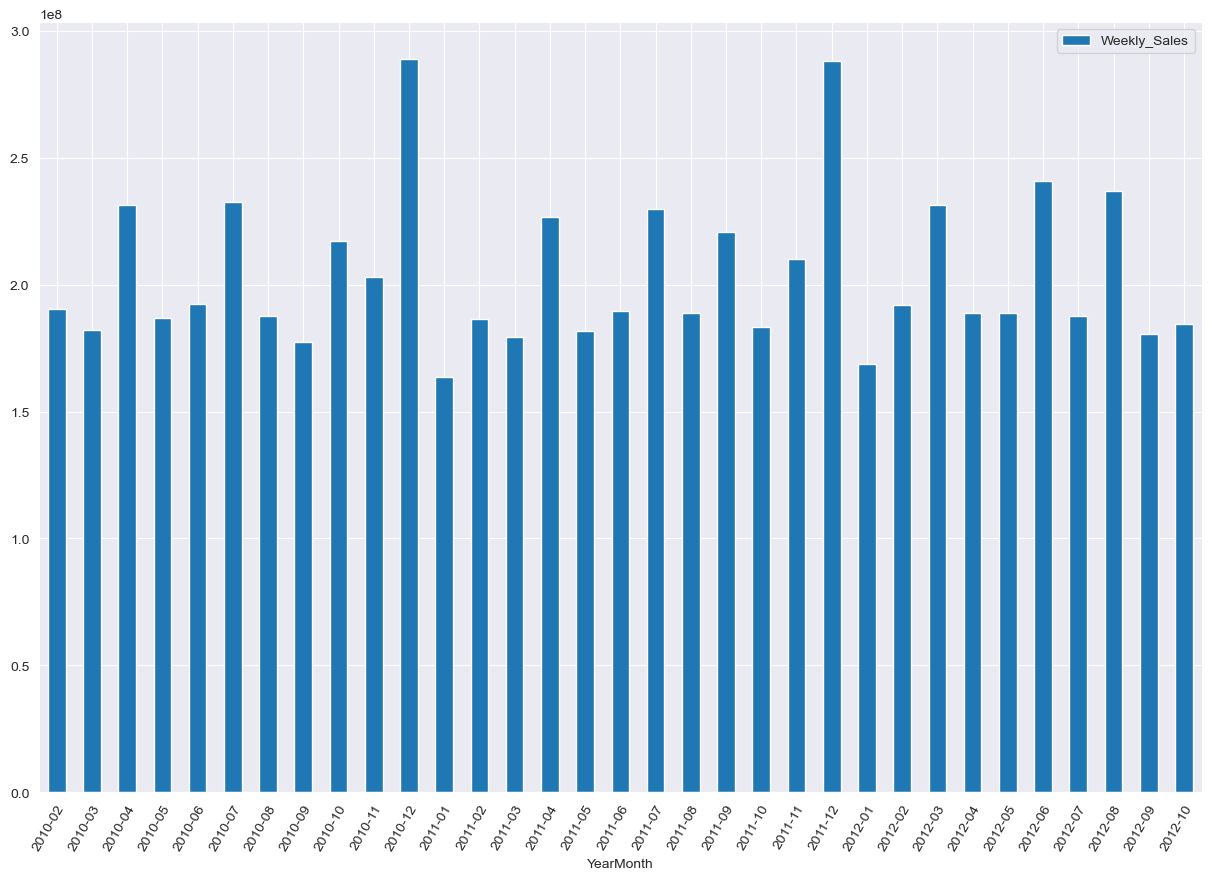

In [36]:
data['Date']=pd.to_datetime(data['Date'],format='%d-%m-%Y')
data['YearMonth']=data['Date'].dt.to_period('M')
monthly_sales=data.groupby('YearMonth')['Weekly_Sales'].sum().reset_index()
fig=monthly_sales.plot.bar(x='YearMonth',y='Weekly_Sales', figsize=(15,10))
fig.set_xticklabels(labels=monthly_sales['YearMonth'], rotation=60, rotation_mode="anchor", ha="right")

              Weekly_Sales  Temperature  Fuel_Price       CPI  Unemployment
Weekly_Sales      1.000000    -0.063810    0.009464 -0.072634     -0.106176
Temperature      -0.063810     1.000000    0.144982  0.176888      0.101158
Fuel_Price        0.009464     0.144982    1.000000 -0.170642     -0.034684
CPI              -0.072634     0.176888   -0.170642  1.000000     -0.302020
Unemployment     -0.106176     0.101158   -0.034684 -0.302020      1.000000


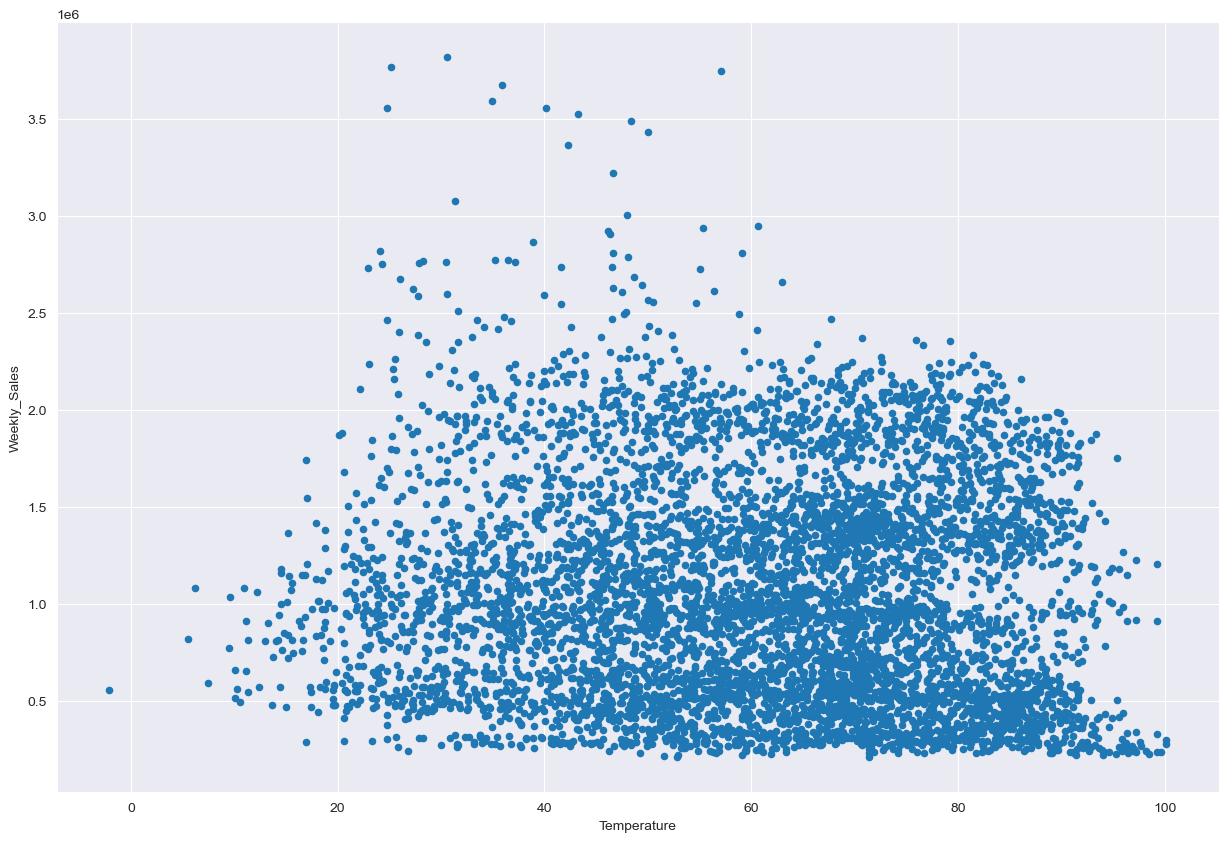

In [54]:
fig=data.plot.scatter(x='Temperature',y='Weekly_Sales', figsize=(15,10))
matrix=data[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']].corr()
print(matrix)

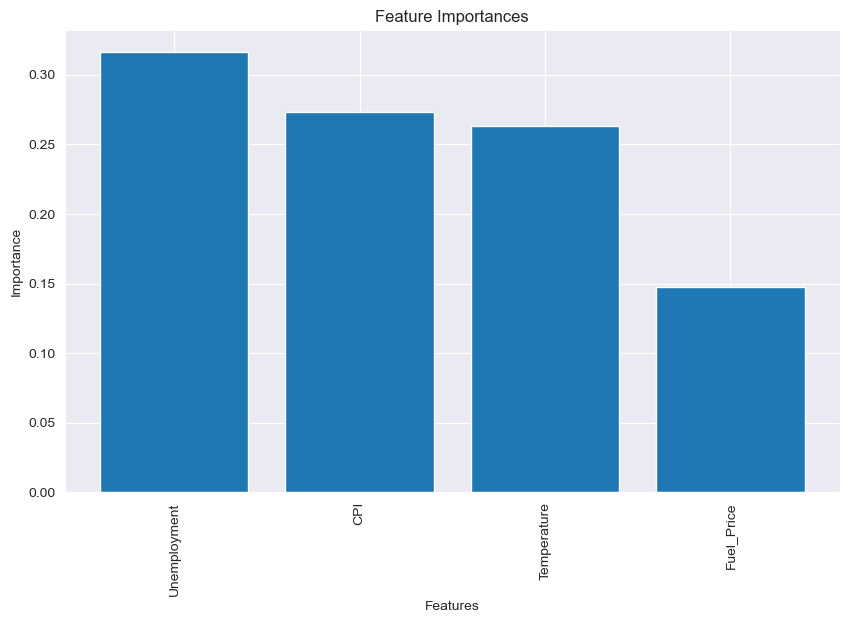

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
X=data[['Temperature','Fuel_Price','CPI','Unemployment']]
y=data['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestRegressor(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]
names = [X.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [49]:
outlier_info = {}

for col in ['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_info[col] = {
        "num_outliers": len(outliers),
        "percent_outliers": 100 * len(outliers) / len(data),
        "lower_bound": lower_bound,
        "upper_bound": upper_bound
    }

outlier_summary = pd.DataFrame(outlier_info).T
outlier_summary

,num_outliers,percent_outliers,lower_bound,upper_bound
Weekly_Sales,34.0,0.528361,-746862.72750,2.720371e+06
Temperature,3.0,0.046620,6.24000,1.161600e+02
Fuel_Price,0.0,0.000000,1.73000,4.938000e+00
CPI,0.0,0.000000,10.22256,3.342557e+02
Unemployment,481.0,7.474747,4.29450,1.121850e+01
